## 🫣Descripción del problema🤔


<div align="justify">

Considere el siguiente texto cifrado, el cual fue encriptado usando un cifrador de sustitución simple a partir de un texto plano en inglés. Encuentre la llave, y averigue a qué corresponde este mensaje.


</div>

<center>


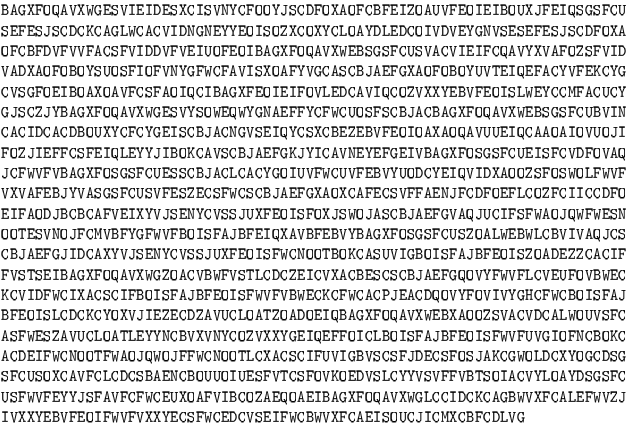





</center>

**Importaciones**


In [8]:
import random
import string
from collections import Counter
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [9]:
texto_encriptado = """BAGXFOQAVXWGESVIEIDESXCISVNYCFOOYJSCDFOXAOFCBFEIZOAUVFEOIEIBOUXJFEIQSGSFCU  
SEFESJSCDCKCAGLWCACVIDNGNEYYEOISOZXCOXYCLOAYDLEDCOIVDVEYGNVSESEFESJSCDFOXA  
OFCBFDVFVVFACSFVIDDVFVEIUOFEOIBAGXFOQAVXWEBSGSFCUSVACVIEIFCQAVYXVAFOZSFVID  
VADXAOFOBOYSUOSFIOFVNYGFWCFAVISXOAFYVGCASCBJAEFGXAOFOBOYUVTEIQEFACYVFEKCYG  
CVSGFOEIBOAXOAVFCSFAOIQCIBAGXFEOIEIFOVLEDCAVIQCOZVXXYEBVFEOISLWEYCCMFACUCY  
GJSCZJYBAGXFOQAVXWGESVYSOWEQWYGNAEFFYCFWCUOSFSCBJACBAGXFOQAVXWEBSGSFCUBVIN  
CACIDCACDBOUXYCFCYGEISCBJACNGVSEIQYCSXCBEZEBVFEOIOAXAOQAVUUEIQCAAOAIOVUOJI  
FOZJIEFFCSFEIQLEYYJIBOKCAVSCBJAEFGKJYICAVNEYEFGEIVBAGXFOSGSFCUEISFCVDFOVAQ  
JCFWVFVBAGXFOSGSFCUESSCBJACLCACYGOIUVFWCUVFEBVYUODCYEIQVIDXAOOZSFOSWOLFWVF  
VXVAFEBJYVASGSFCUSVFESZECSFWCSCBJAEFGXAOXCAFECSVFFAENJFCDFOEFLCOZFCIICCDFO  
EIFAODJBCBCAFVEIXYVJSENYCVSSJUXFEOISFOXJSWOJASCBJAEFGVAQJUCIFSFWAOJQWFWESN  
OOTESVNOJFCMVBFYGFWVFBOISFAJBFEIQXAVBFEBVYBAGXFOSGSFCUSZOALWEBWLCBVIVAQJCS  
CBJAEFGJIDCAXYVJSENYCVSSJUXFEOISFWCNOOTBOKCASUVIGBOISFAJBFEOISZOADEZZCACIF  
FVSTSEIBAGXFOQAVXWGZOACVBWFVSTLCDCZEICVXACBESCSCBJAEFGQOVYFWVFLCVEUFOVBWEC  
KCVIDFWCIXACSCIFBOISFAJBFEOISFWVFVBWECKCFWCACPJEACDQOVYFOVIVYGHCFWCBOISFAJ  
BFEOISLCDCKCYOXVJIEZECDZAVUCLOATZOADOEIQBAGXFOQAVXWEBXAOOZSVACVDCALWOUVSFC  
ASFWESZAVUCLOATLEYYNCBVXVNYCOZVXXYGEIQEFFOICLBOISFAJBFEOISFWVFUVGIOFNCBOKC  
ACDEIFWCNOOTFWAOJQWOJFFWCNOOTLCXACSCIFUVIGBVSCSFJDECSFOSJAKCGWOLDCXYOGCDSG  
SFCUSOXCAVFCLCDCSBAENCBOUUOIUESFVTCSFOVKOEDVSLCYYVSVFFVBTSOIACVYLOAYDSGSFC  
USFWVFEYYJSFAVFCFWCEUXOAFVIBCOZAEQOAEIBAGXFOQAVXWGLCCIDCKCAGBWVXFCALEFWVZJ  
IVXXYEBVFEOIFWVFVXXYECSFWCEDCVSEIFWCBWVXFCAEISOUCJICMXCBFCDLVG"""

**Análisis de frecuencia**

El problema nos dice que se utilizo un cifrador de sustitución simple. Una posible idea es que en este texto se sustituyeron las letras del alfabeto por otras pero de manera fija, por lo que se intentará inicialmente hacer un análisis de frecuencia y empezar a identificar letras comunes.

In [10]:
def frecuencias_ordenadas(texto):

    frecuencias = dict.fromkeys(string.ascii_lowercase, 0)

    texto = texto.lower()

    for caracter in texto:
        if caracter in frecuencias:
            frecuencias[caracter] += 1

    frecuencias_ordenadas = dict(sorted(frecuencias.items(), key=lambda item: item[1], reverse=True))

    return frecuencias_ordenadas
diccionario_encriptado=frecuencias_ordenadas(texto_encriptado)

In [11]:
def contar_ngramas(texto, n):

    texto = texto.lower().replace(" ", "").replace("\n", "")
    texto = ''.join([c for c in texto if c in string.ascii_lowercase])

    ngramas = [texto[i:i+n] for i in range(len(texto)-n+1)]

    conteo_ngramas = Counter(ngramas)

    ngramas_ordenados = dict(sorted(conteo_ngramas.items(), key=lambda item: item[1], reverse=True))

    return ngramas_ordenados


In [12]:
diccionario_encriptado_bigramas=contar_ngramas(texto_encriptado,2)
diccionario_encriptado_trigramas=contar_ngramas(texto_encriptado,3)

In [13]:
def graficar_valores(diccionario, texto,col):

    top_10_items = list(diccionario.items())[:15]


    claves = [item[0] for item in top_10_items]
    valores = [item[1] for item in top_10_items]

    plt.figure(figsize=(10, 6))
    plt.bar(claves, valores, color=col)
    plt.xlabel('Letras')
    plt.ylabel('Frecuencia')
    plt.title(texto)
    plt.show()


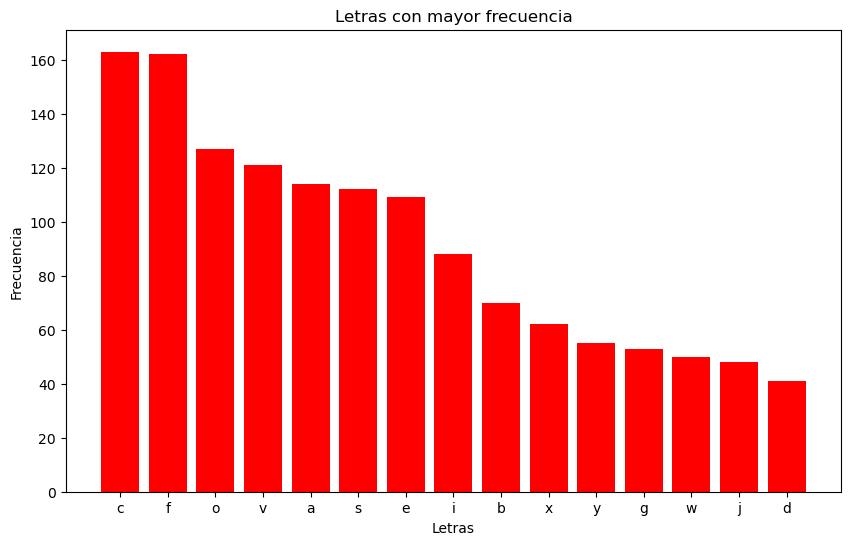

In [14]:
graficar_valores(diccionario_encriptado,'Letras con mayor frecuencia','red')


es posible que en este caso, la letra c, que es la que más se repite sea la letra **e** del idioma ingles.

### Diagrama Frecuencias Letras Ingles


![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/English_letter_frequency_%28frequency%29.svg/2560px-English_letter_frequency_%28frequency%29.svg.png)

Según este diagrama de barras y los resultados de recuencias obtenidos más arriba el texto cifrado que comienza por **BA** podría ser un **Hi**

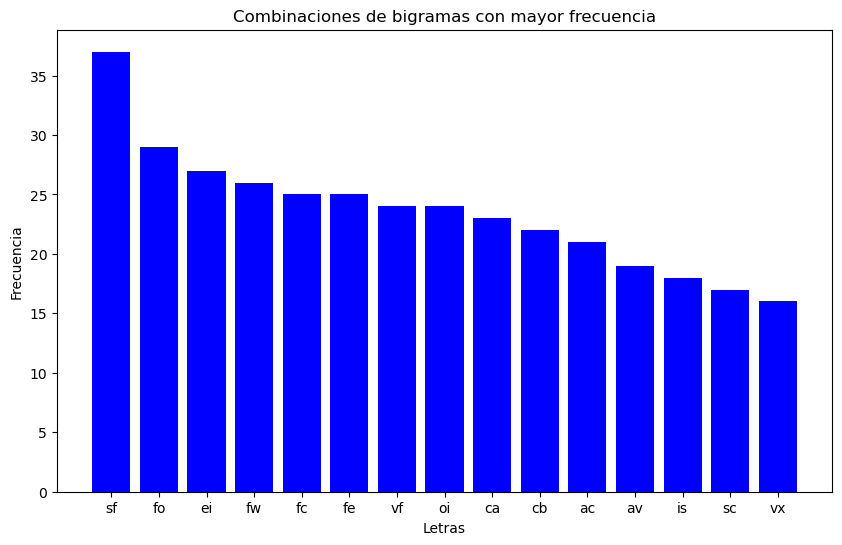

In [15]:
graficar_valores(diccionario_encriptado_bigramas, 'Combinaciones de bigramas con mayor frecuencia', 'blue')

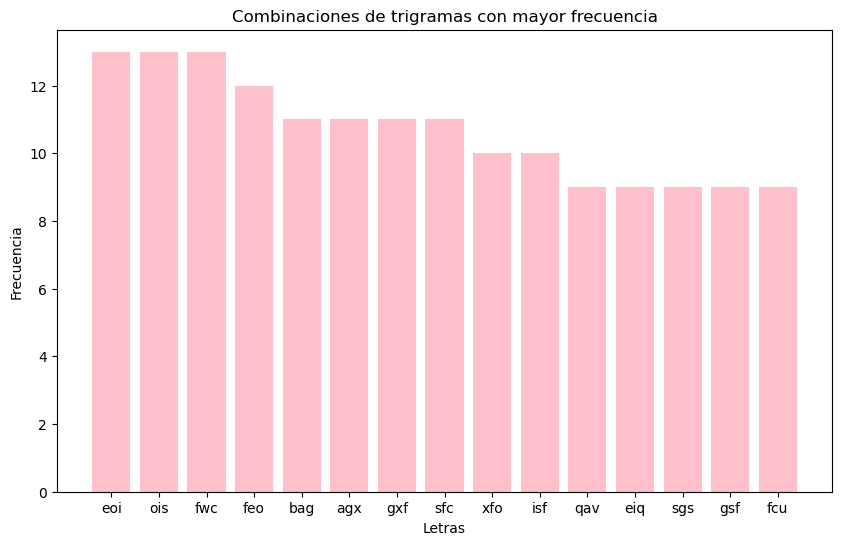

In [118]:
graficar_valores(diccionario_encriptado_trigramas,'Combinaciones de trigramas con mayor frecuencia', 'pink' )

Un primer intento  para ver si en el texto cifrado se encuentra uno de los trigramas más comunes **THE**, veamos si en el texto_cifrado, se encuentran la combinación de letras FIC, considerando a C = e Y F = t, según el diagrama de barras de arriba, e I = h.

In [119]:
palabra = "FIC"

# Contamos cuántas veces aparece la secuencia "FIC" en el texto cifrado
conteo_palabra = texto_encriptado.count(palabra)

# Mostrar el resultado
conteo_palabra

0

la palabra _FIC_, que en el idioma ingles podia ser **THE**, pero no se obtuvieron resultados, Supongamos entonces que la letra I &ne; h. 

En la diagrama de barras de los trigramas no aparecía, el resultado no sorprende.

In [120]:
reemplazos = {
    'C': 'e',
    'F': 't',
}

# Reemplazar las letras según las suposiciones
texto_encriptado_cambio = texto_encriptado  # Iniciar con el texto original

for letra, reemplazo in reemplazos.items():
    texto_encriptado_cambio = texto_encriptado_cambio.replace(letra, reemplazo)  # Actualizar la variable

# Mostrar el texto resultante después de los reemplazos
print(texto_encriptado_cambio)

BAGXtOQAVXWGESVIEIDESXeISVNYetOOYJSeDtOXAOteBtEIZOAUVtEOIEIBOUXJtEIQSGSteU  
SEtESJSeDeKeAGLWeAeVIDNGNEYYEOISOZXeOXYeLOAYDLEDeOIVDVEYGNVSESEtESJSeDtOXA  
OteBtDVtVVtAeStVIDDVtVEIUOtEOIBAGXtOQAVXWEBSGSteUSVAeVIEIteQAVYXVAtOZStVID  
VADXAOtOBOYSUOStIOtVNYGtWetAVISXOAtYVGeASeBJAEtGXAOtOBOYUVTEIQEtAeYVtEKeYG  
eVSGtOEIBOAXOAVteStAOIQeIBAGXtEOIEItOVLEDeAVIQeOZVXXYEBVtEOISLWEYeeMtAeUeY  
GJSeZJYBAGXtOQAVXWGESVYSOWEQWYGNAEttYetWeUOStSeBJAeBAGXtOQAVXWEBSGSteUBVIN  
eAeIDeAeDBOUXYeteYGEISeBJAeNGVSEIQYeSXeBEZEBVtEOIOAXAOQAVUUEIQeAAOAIOVUOJI  
tOZJIEtteStEIQLEYYJIBOKeAVSeBJAEtGKJYIeAVNEYEtGEIVBAGXtOSGSteUEISteVDtOVAQ  
JetWVtVBAGXtOSGSteUESSeBJAeLeAeYGOIUVtWeUVtEBVYUODeYEIQVIDXAOOZStOSWOLtWVt  
VXVAtEBJYVASGSteUSVtESZEeStWeSeBJAEtGXAOXeAtEeSVttAENJteDtOEtLeOZteIIeeDtO  
EItAODJBeBeAtVEIXYVJSENYeVSSJUXtEOIStOXJSWOJASeBJAEtGVAQJUeItStWAOJQWtWESN  
OOTESVNOJteMVBtYGtWVtBOIStAJBtEIQXAVBtEBVYBAGXtOSGSteUSZOALWEBWLeBVIVAQJeS  
eBJAEtGJIDeAXYVJSENYeVSSJUXtEOIStWeNOOTBOKeASUVIGBOIStAJBtEOISZOADEZZeAeIt  

**Hemos reemplazado estas dos primeras letras, pero aún no es posible inferir nada del texto, así que, analizremos nuevamente los diagramas de los bigramas y trigramas.**

Continuando con nuestra suposición, y observando los resultados de los ngramas notamos que el trigrama fwc se repite 13 veces, este trigrama puede ser **THE**, asi , W = h.

El quatrigrama que contiene las letras f,w en el texto cifrado es fwvf, por la sintaxis del idioma ingles, **Thot,thet,thit** no existen estás palabras, por lo tanto nuestra siguiente suposicion es que V = a

In [121]:
reemplazos = {
    "C": "e",
    "F": "t",
    "W": "h",
    "V": "a"
}

# Reemplazar las letras según las suposiciones
texto_encriptado_cambio = texto_encriptado  # Iniciar con el texto original

for letra, reemplazo in reemplazos.items():
    texto_encriptado_cambio = texto_encriptado_cambio.replace(letra, reemplazo)  # Actualizar la variable

# Mostrar el texto resultante después de los reemplazos
print(texto_encriptado_cambio)

BAGXtOQAaXhGESaIEIDESXeISaNYetOOYJSeDtOXAOteBtEIZOAUatEOIEIBOUXJtEIQSGSteU  
SEtESJSeDeKeAGLheAeaIDNGNEYYEOISOZXeOXYeLOAYDLEDeOIaDaEYGNaSESEtESJSeDtOXA  
OteBtDataatAeStaIDDataEIUOtEOIBAGXtOQAaXhEBSGSteUSaAeaIEIteQAaYXaAtOZStaID  
aADXAOtOBOYSUOStIOtaNYGthetAaISXOAtYaGeASeBJAEtGXAOtOBOYUaTEIQEtAeYatEKeYG  
eaSGtOEIBOAXOAateStAOIQeIBAGXtEOIEItOaLEDeAaIQeOZaXXYEBatEOISLhEYeeMtAeUeY  
GJSeZJYBAGXtOQAaXhGESaYSOhEQhYGNAEttYetheUOStSeBJAeBAGXtOQAaXhEBSGSteUBaIN  
eAeIDeAeDBOUXYeteYGEISeBJAeNGaSEIQYeSXeBEZEBatEOIOAXAOQAaUUEIQeAAOAIOaUOJI  
tOZJIEtteStEIQLEYYJIBOKeAaSeBJAEtGKJYIeAaNEYEtGEIaBAGXtOSGSteUEISteaDtOaAQ  
JethataBAGXtOSGSteUESSeBJAeLeAeYGOIUatheUatEBaYUODeYEIQaIDXAOOZStOShOLthat  
aXaAtEBJYaASGSteUSatESZEeStheSeBJAEtGXAOXeAtEeSattAENJteDtOEtLeOZteIIeeDtO  
EItAODJBeBeAtaEIXYaJSENYeaSSJUXtEOIStOXJShOJASeBJAEtGaAQJUeItSthAOJQhthESN  
OOTESaNOJteMaBtYGthatBOIStAJBtEIQXAaBtEBaYBAGXtOSGSteUSZOALhEBhLeBaIaAQJeS  
eBJAEtGJIDeAXYaJSENYeaSSJUXtEOIStheNOOTBOKeASUaIGBOIStAJBtEOISZOADEZZeAeIt  

![secuencialetras](imagenes/atta.png)

Esta secuencia de letras es una buena señal, porque haciendo un análisis de las palabras en ingles , es muy probable que la palabra sea **attack**, por lo que B = c y T = k


In [122]:
reemplazos = {
    "C": "e",
    "F": "t",
    "W": "h",
    "V": "a",
    "B": "c",
    "T": "k"
}

# Reemplazar las letras según las suposiciones
texto_encriptado_cambio = texto_encriptado  # Iniciar con el texto original

for letra, reemplazo in reemplazos.items():
    texto_encriptado_cambio = texto_encriptado_cambio.replace(letra, reemplazo)  # Actualizar la variable

# Mostrar el texto resultante después de los reemplazos
print(texto_encriptado_cambio)

cAGXtOQAaXhGESaIEIDESXeISaNYetOOYJSeDtOXAOtectEIZOAUatEOIEIcOUXJtEIQSGSteU  
SEtESJSeDeKeAGLheAeaIDNGNEYYEOISOZXeOXYeLOAYDLEDeOIaDaEYGNaSESEtESJSeDtOXA  
OtectDataatAeStaIDDataEIUOtEOIcAGXtOQAaXhEcSGSteUSaAeaIEIteQAaYXaAtOZStaID  
aADXAOtOcOYSUOStIOtaNYGthetAaISXOAtYaGeASecJAEtGXAOtOcOYUakEIQEtAeYatEKeYG  
eaSGtOEIcOAXOAateStAOIQeIcAGXtEOIEItOaLEDeAaIQeOZaXXYEcatEOISLhEYeeMtAeUeY  
GJSeZJYcAGXtOQAaXhGESaYSOhEQhYGNAEttYetheUOStSecJAecAGXtOQAaXhEcSGSteUcaIN  
eAeIDeAeDcOUXYeteYGEISecJAeNGaSEIQYeSXecEZEcatEOIOAXAOQAaUUEIQeAAOAIOaUOJI  
tOZJIEtteStEIQLEYYJIcOKeAaSecJAEtGKJYIeAaNEYEtGEIacAGXtOSGSteUEISteaDtOaAQ  
JethatacAGXtOSGSteUESSecJAeLeAeYGOIUatheUatEcaYUODeYEIQaIDXAOOZStOShOLthat  
aXaAtEcJYaASGSteUSatESZEeStheSecJAEtGXAOXeAtEeSattAENJteDtOEtLeOZteIIeeDtO  
EItAODJceceAtaEIXYaJSENYeaSSJUXtEOIStOXJShOJASecJAEtGaAQJUeItSthAOJQhthESN  
OOkESaNOJteMactYGthatcOIStAJctEIQXAactEcaYcAGXtOSGSteUSZOALhEchLecaIaAQJeS  
ecJAEtGJIDeAXYaJSENYeaSSJUXtEOIStheNOOkcOKeASUaIGcOIStAJctEOISZOADEZZeAeIt  

![texto](imagenes/tect.png)

Nuestro siguiente avance fue encontrar esta secuencia de letras tect, en las 2 coincidencias Tiene tOXAO antes, una posible opción seria _detect_ o _protect_ , la anterior palabra que teniamos, era attack, estas 2 palabras pueden satisfacer el contexto que estamos descubriendo. pero detect tiene una letra e anterior y en nuestra coincidencia no satisfacería, por lo cuál nuestra siguiente suposición es X= p, A=r, O=o

In [123]:
reemplazos = {
    "C": "e",
    "F": "t",
    "W": "h",
    "V": "a",
    "B": "c",
    "T": "k",
    "X": "p",
    "A": "r",
    "O": "o"
}

# Reemplazar las letras según las suposiciones
texto_encriptado_cambio = texto_encriptado  # Iniciar con el texto original

for letra, reemplazo in reemplazos.items():
    texto_encriptado_cambio = texto_encriptado_cambio.replace(letra, reemplazo)  # Actualizar la variable

# Mostrar el texto resultante después de los reemplazos
print(texto_encriptado_cambio)

crGptoQraphGESaIEIDESpeISaNYetooYJSeDtoprotectEIZorUatEoIEIcoUpJtEIQSGSteU  
SEtESJSeDeKerGLhereaIDNGNEYYEoISoZpeopYeLorYDLEDeoIaDaEYGNaSESEtESJSeDtopr  
otectDataatreStaIDDataEIUotEoIcrGptoQraphEcSGSteUSareaIEIteQraYpartoZStaID  
arDprotocoYSUoStIotaNYGthetraISportYaGerSecJrEtGprotocoYUakEIQEtreYatEKeYG  
eaSGtoEIcorporateStroIQeIcrGptEoIEItoaLEDeraIQeoZappYEcatEoISLhEYeeMtreUeY  
GJSeZJYcrGptoQraphGESaYSohEQhYGNrEttYetheUoStSecJrecrGptoQraphEcSGSteUcaIN  
ereIDereDcoUpYeteYGEISecJreNGaSEIQYeSpecEZEcatEoIorproQraUUEIQerrorIoaUoJI  
toZJIEtteStEIQLEYYJIcoKeraSecJrEtGKJYIeraNEYEtGEIacrGptoSGSteUEISteaDtoarQ  
JethatacrGptoSGSteUESSecJreLereYGoIUatheUatEcaYUoDeYEIQaIDprooZStoShoLthat  
apartEcJYarSGSteUSatESZEeStheSecJrEtGpropertEeSattrENJteDtoEtLeoZteIIeeDto  
EItroDJcecertaEIpYaJSENYeaSSJUptEoIStopJShoJrSecJrEtGarQJUeItSthroJQhthESN  
ookESaNoJteMactYGthatcoIStrJctEIQpractEcaYcrGptoSGSteUSZorLhEchLecaIarQJeS  
ecJrEtGJIDerpYaJSENYeaSSJUptEoIStheNookcoKerSUaIGcoIStrJctEoISZorDEZZereIt  

![criptograhy](imagenes/crypto.png)

La anterior suposición fue muy buena e hizo que muchas letras del texto empiecen a tener coherencia, es bastante probable que las suposiciones que hicimos sean correctas, ya tenemos varias, palabras completas,to,protect,chapter,entre otras.

Nuestro siguiente objetivo es encontrar otras posibles palabras dado el anterior resultado. 

Dada las letras de las primera palabra de nuestro texto cifrado, diremos que G=y, Q=g



In [124]:
reemplazos = {
    "C": "e",
    "F": "t",
    "W": "h",
    "V": "a",
    "B": "c",
    "T": "k",
    "X": "p",
    "A": "r",
    "O": "o",
    "G": "y",
    "Q": "g"
}

# Reemplazar las letras según las suposiciones
texto_encriptado_cambio = texto_encriptado  # Iniciar con el texto original

for letra, reemplazo in reemplazos.items():
    texto_encriptado_cambio = texto_encriptado_cambio.replace(letra, reemplazo)  # Actualizar la variable

# Mostrar el texto resultante después de los reemplazos
print(texto_encriptado_cambio)

cryptographyESaIEIDESpeISaNYetooYJSeDtoprotectEIZorUatEoIEIcoUpJtEIgSySteU  
SEtESJSeDeKeryLhereaIDNyNEYYEoISoZpeopYeLorYDLEDeoIaDaEYyNaSESEtESJSeDtopr  
otectDataatreStaIDDataEIUotEoIcryptographEcSySteUSareaIEItegraYpartoZStaID  
arDprotocoYSUoStIotaNYythetraISportYayerSecJrEtyprotocoYUakEIgEtreYatEKeYy  
eaSytoEIcorporateStroIgeIcryptEoIEItoaLEDeraIgeoZappYEcatEoISLhEYeeMtreUeY  
yJSeZJYcryptographyESaYSohEghYyNrEttYetheUoStSecJrecryptographEcSySteUcaIN  
ereIDereDcoUpYeteYyEISecJreNyaSEIgYeSpecEZEcatEoIorprograUUEIgerrorIoaUoJI  
toZJIEtteStEIgLEYYJIcoKeraSecJrEtyKJYIeraNEYEtyEIacryptoSySteUEISteaDtoarg  
JethatacryptoSySteUESSecJreLereYyoIUatheUatEcaYUoDeYEIgaIDprooZStoShoLthat  
apartEcJYarSySteUSatESZEeStheSecJrEtypropertEeSattrENJteDtoEtLeoZteIIeeDto  
EItroDJcecertaEIpYaJSENYeaSSJUptEoIStopJShoJrSecJrEtyargJUeItSthroJghthESN  
ookESaNoJteMactYythatcoIStrJctEIgpractEcaYcryptoSySteUSZorLhEchLecaIargJeS  
ecJrEtyJIDerpYaJSENYeaSSJUptEoIStheNookcoKerSUaIycoIStrJctEoISZorDEZZereIt  

![prrograbook](imagenes/book_progra.png) 

Seguimos completando entonces el resto de letras con los resultados obtenidos:

- U = m
- N = b
- E = i
- I = N

In [125]:
reemplazos = {
    "C": "e",
    "F": "t",
    "W": "h",
    "V": "a",
    "B": "c",
    "T": "k",
    "X": "p",
    "A": "r",
    "O": "o",
    "G": "y",
    "Q": "g",
     "U": "m",
    "N": "b",
    "E": "i",
    "I": "n"
}

# Reemplazar las letras según las suposiciones
texto_encriptado_cambio = texto_encriptado  # Iniciar con el texto original

for letra, reemplazo in reemplazos.items():
    texto_encriptado_cambio = texto_encriptado_cambio.replace(letra, reemplazo)  # Actualizar la variable

# Mostrar el texto resultante después de los reemplazos
print(texto_encriptado_cambio)

cryptographyiSaninDiSpenSabYetooYJSeDtoprotectinZormationincompJtingSyStem  
SitiSJSeDeKeryLhereanDbybiYYionSoZpeopYeLorYDLiDeonaDaiYybaSiSitiSJSeDtopr  
otectDataatreStanDDatainmotioncryptographicSyStemSareanintegraYpartoZStanD  
arDprotocoYSmoStnotabYythetranSportYayerSecJrityprotocoYmakingitreYatiKeYy  
eaSytoincorporateStrongencryptionintoaLiDerangeoZappYicationSLhiYeeMtremeY  
yJSeZJYcryptographyiSaYSohighYybrittYethemoStSecJrecryptographicSyStemcanb  
erenDereDcompYeteYyinSecJrebyaSingYeSpeciZicationorprogrammingerrornoamoJn  
toZJnitteStingLiYYJncoKeraSecJrityKJYnerabiYityinacryptoSySteminSteaDtoarg  
JethatacryptoSyStemiSSecJreLereYyonmathematicaYmoDeYinganDprooZStoShoLthat  
aparticJYarSyStemSatiSZieStheSecJritypropertieSattribJteDtoitLeoZtenneeDto  
introDJcecertainpYaJSibYeaSSJmptionStopJShoJrSecJrityargJmentSthroJghthiSb  
ookiSaboJteMactYythatconStrJctingpracticaYcryptoSyStemSZorLhichLecanargJeS  
ecJrityJnDerpYaJSibYeaSSJmptionSthebookcoKerSmanyconStrJctionSZorDiZZerent  

![varias](imagenes/indis-expec-compu.png)

Ya solo queda seguir analizando el texto, encontrando relaciones entre letras y palabras, por la siguiente imagen podemos asignar ciertas letras, tenemos la palabra _indispensable_, _computing_,_expected_ e _information_.

- S = s
- Y = l
- Z = f
- D = d
- M = x
- J = u

In [126]:
reemplazos = {
    "C": "e",
    "F": "t",
    "W": "h",
    "V": "a",
    "B": "c",
    "T": "k",
    "X": "p",
    "A": "r",
    "O": "o",
    "G": "y",
    "Q": "g",
    "U": "m",
    "N": "b",
    "E": "i",
    "I": "n",
    "S": "s",
    "Y": "l",
    "Z": "f",
    "D": "d",
    "M": "x",
    "J": "u"
}

# Reemplazar las letras según las suposiciones
texto_encriptado_cambio = texto_encriptado  # Iniciar con el texto original

for letra, reemplazo in reemplazos.items():
    texto_encriptado_cambio = texto_encriptado_cambio.replace(letra, reemplazo)  # Actualizar la variable

# Mostrar el texto resultante después de los reemplazos
print(texto_encriptado_cambio)

cryptographyisanindispensabletoolusedtoprotectinformationincomputingsystem  
sitisusedeKeryLhereandbybillionsofpeopleLorldLideonadailybasisitisusedtopr  
otectdataatrestanddatainmotioncryptographicsystemsareanintegralpartofstand  
ardprotocolsmostnotablythetransportlayersecurityprotocolmakingitrelatiKely  
easytoincorporatestrongencryptionintoaLiderangeofapplicationsLhileextremel  
yusefulcryptographyisalsohighlybrittlethemostsecurecryptographicsystemcanb  
erenderedcompletelyinsecurebyasinglespecificationorprogrammingerrornoamoun  
tofunittestingLilluncoKerasecurityKulnerabilityinacryptosysteminsteadtoarg  
uethatacryptosystemissecureLerelyonmathematicalmodelingandproofstoshoLthat  
aparticularsystemsatisfiesthesecuritypropertiesattributedtoitLeoftenneedto  
introducecertainplausibleassumptionstopushoursecurityargumentsthroughthisb  
ookisaboutexactlythatconstructingpracticalcryptosystemsforLhichLecanargues  
ecurityunderplausibleassumptionsthebookcoKersmanyconstructionsfordifferent  

![vwz](imagenes/everywhere-analyze.png)

Aquí identificamos que:

- K = v
- L = w
- H = z


In [127]:
reemplazos = {
    "C": "e",
    "F": "t",
    "W": "h",
    "V": "a",
    "B": "c",
    "T": "k",
    "X": "p",
    "A": "r",
    "O": "o",
    "G": "y",
    "Q": "g",
    "U": "m",
    "N": "b",
    "E": "i",
    "I": "n",
    "S": "s",
    "Y": "l",
    "Z": "f",
    "D": "d",
    "M": "x",
    "J": "u",
    "K": "v",
    "L": "w",
    "H": "z",
}
# Reemplazar las letras según las suposiciones
texto_encriptado_cambio = texto_encriptado  # Iniciar con el texto original

for letra, reemplazo in reemplazos.items():
    texto_encriptado_cambio = texto_encriptado_cambio.replace(letra, reemplazo)  # Actualizar la variable

# Mostrar el texto resultante después de los reemplazos
print(texto_encriptado_cambio)

cryptographyisanindispensabletoolusedtoprotectinformationincomputingsystem  
sitisusedeverywhereandbybillionsofpeopleworldwideonadailybasisitisusedtopr  
otectdataatrestanddatainmotioncryptographicsystemsareanintegralpartofstand  
ardprotocolsmostnotablythetransportlayersecurityprotocolmakingitrelatively  
easytoincorporatestrongencryptionintoawiderangeofapplicationswhileextremel  
yusefulcryptographyisalsohighlybrittlethemostsecurecryptographicsystemcanb  
erenderedcompletelyinsecurebyasinglespecificationorprogrammingerrornoamoun  
tofunittestingwilluncoverasecurityvulnerabilityinacryptosysteminsteadtoarg  
uethatacryptosystemissecurewerelyonmathematicalmodelingandproofstoshowthat  
aparticularsystemsatisfiesthesecuritypropertiesattributedtoitweoftenneedto  
introducecertainplausibleassumptionstopushoursecurityargumentsthroughthisb  
ookisaboutexactlythatconstructingpracticalcryptosystemsforwhichwecanargues  
ecurityunderplausibleassumptionsthebookcoversmanyconstructionsfordifferent  

![letraq](imagenes/required.png)

Aquí identificamos que:

- P = q

para que la palabra sea required, pues terminaba en uired y de esta manera damos por finalizado el **primer punto de la tarea**

In [128]:
reemplazos = {
    "C": "e",
    "F": "t",
    "W": "h",
    "V": "a",
    "B": "c",
    "T": "k",
    "X": "p",
    "A": "r",
    "O": "o",
    "G": "y",
    "Q": "g",
    "U": "m",
    "N": "b",
    "E": "i",
    "I": "n",
    "S": "s",
    "Y": "l",
    "Z": "f",
    "D": "d",
    "M": "x",
    "J": "u",
    "K": "v",
    "L": "w",
    "H": "z",
    "P": "q"
}
# Reemplazar las letras según las suposiciones
texto_encriptado_cambio = texto_encriptado  # Iniciar con el texto original

for letra, reemplazo in reemplazos.items():
    texto_encriptado_cambio = texto_encriptado_cambio.replace(letra, reemplazo)  # Actualizar la variable

# Mostrar el texto resultante después de los reemplazos
print(texto_encriptado_cambio)

cryptographyisanindispensabletoolusedtoprotectinformationincomputingsystem  
sitisusedeverywhereandbybillionsofpeopleworldwideonadailybasisitisusedtopr  
otectdataatrestanddatainmotioncryptographicsystemsareanintegralpartofstand  
ardprotocolsmostnotablythetransportlayersecurityprotocolmakingitrelatively  
easytoincorporatestrongencryptionintoawiderangeofapplicationswhileextremel  
yusefulcryptographyisalsohighlybrittlethemostsecurecryptographicsystemcanb  
erenderedcompletelyinsecurebyasinglespecificationorprogrammingerrornoamoun  
tofunittestingwilluncoverasecurityvulnerabilityinacryptosysteminsteadtoarg  
uethatacryptosystemissecurewerelyonmathematicalmodelingandproofstoshowthat  
aparticularsystemsatisfiesthesecuritypropertiesattributedtoitweoftenneedto  
introducecertainplausibleassumptionstopushoursecurityargumentsthroughthisb  
ookisaboutexactlythatconstructingpracticalcryptosystemsforwhichwecanargues  
ecurityunderplausibleassumptionsthebookcoversmanyconstructionsfordifferent  

<p align="center">
    Cryptography is an indispensable tool used to protect information in computing systems.  
    It is used everywhere and by billions of people worldwide on a daily basis. It is used to  
    protect data at rest and data in motion. Cryptographic systems are an integral part of stand  
    ard protocols, most notably the transport layer security protocol, making it relatively  
    easy to incorporate strong encryption into a wide range of applications. While extreme  
    ly useful, cryptography is also highly brittle. The most secure cryptographic system can be  
    rendered completely insecure by a single specification or programming error. No amount  
    of unit testing will uncover a security vulnerability in a cryptosystem. Instead, to argue  
    that a cryptosystem is secure, we rely on mathematical modeling and proofs to show that  
    a particular system satisfies the security properties attributed to it. We often need to  
    introduce certain plausible assumptions to push our security arguments through. This  
    book is about exactly that: constructing practical cryptosystems for which we can argue  
    security under plausible assumptions. The book covers many constructions for different  
    tasks in cryptography. For each task, we define a precise security goal that we aim to achieve  
    and then present constructions that achieve the required goal. To analyze the construc  
    tions, we develop a unified framework for doing cryptographic proofs. A reader who master  
    s this framework will be capable of applying it to new constructions that may not be cover  
    ed in the book. Throughout the book, we present many case studies to survey how deployed sys  
    tems operate. We describe common mistakes to avoid as well as attacks on real-world sys  
    tems that illustrate the importance of rigor in cryptography. We end every chapter with a fu  
    n application that applies the ideas in the chapter in some unexpected way.
</p>


# **Ejercicio 2**

In [129]:
texto_cifrado = "f4c4e842d8d77c7323770fa3520a954bd385e859c085d726267c4c9a4148885196e6fa45cdc0f17f677700ea50438a4ad9d7bb47ccc0bd3e26669fea410aa95fc448fa16f0d7f431266002af1b0a974bc6caf551d685ec26223209a6005a9651d5c0e85999c0ee27a63209a4004f881ec4c0f843dcd7f93c677609ea54458051c585e216c8d0f873297d4cb9450a8a5bd5c0e85fcdc4f3732a7315a5524f971ed3ddeb5ad0c6fc302e7d02af530a9751d4d7fe16d4ccbd2322601fa54e4bca1ef7d0f547ccc0bd3d2e3209a6004e8d5fd4c9f416cac4ff3667631923004f971edacabb47ccc0bd3b263208af0058815dd9d7ff57cb85f132677509a4544fc81ed8ccbb46d6d7bd2232fb42ea6544c44cd3c4f75fddc4f97f676105af4d5a965b96cdfe16c9c0f320267603ea515f811ed8cabb5ed8dcbd3e227f03b8494bc45dd9c9fe55cdcceb326b3200a5005b915b96d4ee5fc344bd2022734cbf4e4bc458d9d7f65799c1f87323770aaf4e59851ed2c0bb5ad885f82037770fa3450a8c4bdbc4f5579785d13267741eab534fc41cc2caff5999d1f4362a6203ea504b975fd2cabb50ccc0bd3e227803b8020a8a5196ccf552d0c6fc73366709ea4144905bc585e843dac0f93a22600da400478150d9d6bb55d6d6fc20677f0da64159c81ec5ccf55999d4e836673f0aaf4c439e53d3cbef539485f132677509a4544fc452d7d6bb53dacdfc73227c4caf4c0a8b52c0ccff599785d936347609ea4c5f8159d989bb45dcc8f839267c18af004c965fc5c0bb58d685e93a227c09ea564b8857d2c0e116cccbf42522601fab4c11c447d989bb46d6d7bd362d7701ba4c45c81edbc0bb55d8d7fc3033771ea35a45c44ed9d7bb44dcc6f22123731eea50588158d3d7fe58cdc0f036296609ea4c45971edec0f85ed6d6bd3e267e03b90053c81ed7d6761a99c6fc202e321ca54458095f96c1fe55d0d7bd2232774ce85445805196d1f253d4d5f27337731fab4445c458c3c0bb46dccaef716b321fa300448b1ed0d0fe44d885ed3c356319af004f881ec6d7fe45dccbe936677f09ea504b965bd5c0bb42d8cbbd3b28601ea34246811ed5caf65999c0f17337731fab4445df1ec4c0f843dcd7f93c67660da4544b971ed5c4f757d4ccf93223771fe6005e8550c2cae816cbcaee27357d1fea43c78a57d5cae816c085fe21327700af 5306c44ad7cbef57ca85f0322b731fea41498757d9cbfe459585ec26223200ab00478153d9d7f25799c0ee7337731eab0047091ed5caf65999c9fc73337701af5245975f96c9ee4c99d4e836677300bf4d48965f96d0f516ca56ef372e7603ea4d5f975bd985ff5399c9fc7331771eaddc4f8a44d78bbb97fad07c3d33731fea564f875bc585f35399d4e836237308a5004b9452d7d6ef57ddcabd3732600da4544fc456d9d7fa459585f83d676702ea52438a5d45cbbb59cac6e821283208af4c0a905fdac9fe449585f93634621923530a805b96c9fe53cb85e83d263202a554438757d785fe5899c9fc7334770fa949d98a1ec6caf75fdaccfc3f66323caf5245c452d785ed53cbc1fc3767771fea515f811ed8cabb45d0c0f02335774ca64f0a89dfc585ed53cbc2f23d3d7d1fa5004e811edac4bb44d8dffc732f6701ab4e4bc45fc6c4e953dac0bd322b7e81f10042854dc2c4bb55d0c0ef2728321cbf4e5e8b1296c9f44599c6ef3a2a7b02ab4c4f971ec5caf516dec0f3272232012b530a8857dbd5f2579585f0b2343205a44f4c8150c5cced578285f82033734cab46439653d7c6f2c5d785f33c677e0dea484b835196d5f444c8d0f8733e7d4ca74959895196cdfa4fd885f032337308a5004bc44bd885e853cb85f5262a7302a51a0a814d96d0f55799cdf23d226118ab0053c44ec4cafd43d7c1fc73247d02bc4949875745cbb51606f0f3732e7c08a35643804bd985fe4599d5f821297b0fa34f598b0196f5ee53ca85ee36677e03ea4c43954bdfc1fa16c085ee3667730fab42d9ca1ef3d6f416dcd6bd3f28321dbf450a9d5196c9f757d4cabd2629734ca8554f8a5f96c4f855d056f37d674205af4e59815096c6eed7d7d1f273377703b8004f971ec6c4e95799c9fc73347d0fa3454e855a96d4ee5399c0ee36677b02ae495c8d5ac3cabb45d0c2fc7323771fbe49468550d2cabb45cc85eb36297702a50053c44fc3c0bb53d785eb363d3208af004f8857dbccf557cbc9f27334774cbb5543814cd785f859d7d1ef32356009b9544b961ec5d0bb57dac6f4a029321eaf435f964cdfc0f552d685fc73267c9fa449478b4d9a85f657d5c0f93a247702a9494bc44796caef44d8d6bd31267809b04159c44dd3c8fe5cd8cbe936343c4c8f4e0a885196d4ee5399c4bd3eaa321faf00588158dfc0e9539585f936257d4ca94f44825bc5c4e916c8d0f873267a03b8410a885fdbc0f542d685f33c677a0da84558c45fc6d7f4 40dcc6f532237d4ca745408b4c96c0f716cdccf83e377d4cae450a895796c9f254dcd7e932233e4ca6495b9157d2c4f552d685fc73347705b90045c44ddfc0ef5399d1f42328614cbb554fc45dd9cbf44cdacab373166709ea4546c453c3cbff5999c0ee732f7d1eb84948885b9a85fe4599d0f332676409b8444b801ec7d0fe16d7cabd3d227109b9495e851ed2c0f659cad1ef32247b9fa40e0aa65fc5d1fa4454c4bd26293204af43428b1ec6c4e95799d5ef3c25731ea64f06c45bd885ef59ddcabd30266103f0004f8a1ec3cbbb55d8c8ed3c677609ea43458a5dd3cbef44d8c6f4a0293219a4004f9c1ec6ccfa58d0d6e932676109ea515f81544585ff5399cdfc3e256009ea590a8150c2caf555dcd6bd3f283203a84c43835fc4caf516d885fe3c2a771eb9450a9150d785e957cdc4b17337771ea5005c8d48d78bbb78d685f820677609ea45598b1296d6f25899c0f03126600ba50c0a805b96c9f416c8d0f873366705af5245c456d7c7f757cb85fc3b28600df10053851ed2cce9df99c87c20677308af4c4b8a4ad389bb45d085f5323e3203a941598dcdd889bb57d5c2f2732af31fea5345864cd385fe45cdc0bd32346702be4f0a805b96c9fa16cbc4e932697d24a3547cb14c"
texto_cifrado = texto_cifrado.replace(' ', '')
print(len(texto_cifrado)//2)

2224


<div align="justify">
Se nos da el texto cifrado y debemos desencriptarlo y encontrar la llave usada, sabemos también que el OTP (*One-time Pad*) fue el sistema de encripción usado, el cual es demostrablemente seguro y perfectamente secreto $(|K| \geq |M|)$; sin embargo, tenemos conocimiento de que la llave usada es mucho más pequeña que el texto plano (es 139 veces más pequeña que el mensaje a encriptar), entonces usaremos este hecho a nuestra conveniencia para descifrar lo que oculta este OTP.
</div>

![punto2-1](imagenes/punto2-1.png)

In [130]:
mensajes = []
for m in range(139):
  mensajes.append(texto_cifrado[32*m:32*(m+1)])
print(mensajes)

['f4c4e842d8d77c7323770fa3520a954b', 'd385e859c085d726267c4c9a41488851', '96e6fa45cdc0f17f677700ea50438a4a', 'd9d7bb47ccc0bd3e26669fea410aa95f', 'c448fa16f0d7f431266002af1b0a974b', 'c6caf551d685ec26223209a6005a9651', 'd5c0e85999c0ee27a63209a4004f881e', 'c4c0f843dcd7f93c677609ea54458051', 'c585e216c8d0f873297d4cb9450a8a5b', 'd5c0e85fcdc4f3732a7315a5524f971e', 'd3ddeb5ad0c6fc302e7d02af530a9751', 'd4d7fe16d4ccbd2322601fa54e4bca1e', 'f7d0f547ccc0bd3d2e3209a6004e8d5f', 'd4c9f416cac4ff3667631923004f971e', 'dacabb47ccc0bd3b263208af0058815d', 'd9d7ff57cb85f132677509a4544fc81e', 'd8ccbb46d6d7bd2232fb42ea6544c44c', 'd3c4f75fddc4f97f676105af4d5a965b', '96cdfe16c9c0f320267603ea515f811e', 'd8cabb5ed8dcbd3e227f03b8494bc45d', 'd9c9fe55cdcceb326b3200a5005b915b', '96d4ee5fc344bd2022734cbf4e4bc458', 'd9d7f65799c1f87323770aaf4e59851e', 'd2c0bb5ad885f82037770fa3450a8c4b', 'dbc4f5579785d13267741eab534fc41c', 'c2caff5999d1f4362a6203ea504b975f', 'd2cabb50ccc0bd3e227803b8020a8a51', '96ccf552d0c6fc73366709ea41

Debemos mirar lo qué sucede durante la operación $XOR$ dentro de cada una de las subdivisiones
![punto2-1](imagenes/punto2-2.png)

<div align="justify">

Notemos que en cada subdivisión del mensaje hay otras 16 subdivisiones $(m_{1_{1}},m_{1_{2}},...,m_{1_{16}})$ donde cada una de estas subdisiones es de 8 bits o (1 byte), y podemos notar que también hemos dividido la llave en 16 partes, cada una de 8 bits también, estos 8 bits representan 1 caracter tanto en el texto plano como en el texto cifrado y como el *XOR* es un *bitwise* operador entonces podemos aplicar la operación bit a bit, en este caso, el primer byte del mensaje se encripta con el primer byte de la llave.<br>

La nota de arriba es una observación interesante que explota el **uso repetitivo de la llave** a lo largo de la encripción, notemos lo siguiente:

$$c_i \oplus c_j = (m_i \oplus k )\oplus (m_j \oplus k) = (m_i \oplus m_j) \oplus (k\oplus k) = m_i \oplus m_j
$$<br>
luego<br>
$$c_i \oplus c_j \oplus m_j = m_i$$<br>
donde $m_i$ y $m_j$ pertenecen al texto plano.<br>

En particular para nuestro ejemplo anterior $m_{1_{i}}$ y $m_{2_{i}}$ son letras que aparecen en el texto plano que han sido encriptadas con los 8 bits de la llave en ($k_i$).

</div>

<div align="justify">

Ahora, analicemos la codificación del texto a profundidad, para esto, notemos la siguiente tabla de los símbolos que contiene el estándar de codificación *latin-1* con su respectiva representación hexadecimal:

</div>

![punto2-1](imagenes/punto2-3.png)

In [131]:

# diccionario de latin-1, algunas entradas del siguiente diccionario no estarán definidas, estás son: desde la
# 00 - 1F, 7F - 9F, ni la A0 en nuestro caso; para un total de 66 caracteres que reemplazaremos por '-' en nuestro diccionario:

latin_1 = {
    '00': '-', '01': '-', '02': '-', '03': '-', '04': '-', '05': '-', '06': '-', '07': '-', '08': '-', '09': '-',
    '0A': '-', '0B': '-', '0C': '-', '0D': '-', '0E': '-', '0F': '-', '10': '-', '11': '-', '12': '-', '13': '-',
    '14': '-', '15': '-', '16': '-', '17': '-', '18': '-', '19': '-', '1A': '-', '1B': '-', '1C': '-', '1D': '-',
    '1E': '-', '1F': '-', '20': ' ', '21': '!', '22': '"', '23': '#', '24': '$', '25': '%', '26': '&', '27': "'",
    '28': '(', '29': ')', '2A': '*', '2B': '+', '2C': ',', '2D': '-', '2E': '.', '2F': '/', '30': '0', '31': '1',
    '32': '2', '33': '3', '34': '4', '35': '5', '36': '6', '37': '7', '38': '8', '39': '9', '3A': ':', '3B': ';',
    '3C': '<', '3D': '=', '3E': '>', '3F': '?', '40': '@', '41': 'A', '42': 'B', '43': 'C', '44': 'D', '45': 'E',
    '46': 'F', '47': 'G', '48': 'H', '49': 'I', '4A': 'J', '4B': 'K', '4C': 'L', '4D': 'M', '4E': 'N', '4F': 'O',
    '50': 'P', '51': 'Q', '52': 'R', '53': 'S', '54': 'T', '55': 'U', '56': 'V', '57': 'W', '58': 'X', '59': 'Y',
    '5A': 'Z', '5B': '[', '5C': '\\', '5D': ']', '5E': '^', '5F': '_', '60': '`', '61': 'a', '62': 'b', '63': 'c',
    '64': 'd', '65': 'e', '66': 'f', '67': 'g', '68': 'h', '69': 'i', '6A': 'j', '6B': 'k', '6C': 'l', '6D': 'm',
    '6E': 'n', '6F': 'o', '70': 'p', '71': 'q', '72': 'r', '73': 's', '74': 't', '75': 'u', '76': 'v', '77': 'w',
    '78': 'x', '79': 'y', '7A': 'z', '7B': '{', '7C': '|', '7D': '}', '7E': '~', '7F': '-', '80': '-', '81': '-',
    '82': '-', '83': '-', '84': '-', '85': '-', '86': '-', '87': '-', '88': '-', '89': '-', '8A': '-', '8B': '-',
    '8C': '-', '8D': '-', '8E': '-', '8F': '-', '90': '-', '91': '-', '92': '-', '93': '-', '94': '-', '95': '-',
    '96': '-', '97': '-', '98': '-', '99': '-', '9A': '-', '9B': '-', '9C': '-', '9D': '-', '9E': '-', '9F': '-',
    'A0': '-', 'A1': '¡', 'A2': '¢', 'A3': '£', 'A4': '¤', 'A5': '¥', 'A6': '¦', 'A7': '§', 'A8': '¨', 'A9': '©',
    'AA': 'ª', 'AB': '«', 'AC': '¬', 'AD': '\xad', 'AE': '®', 'AF': '¯', 'B0': '°', 'B1': '±', 'B2': '²', 'B3': '³',
    'B4': '´', 'B5': 'µ', 'B6': '¶', 'B7': '·', 'B8': '¸', 'B9': '¹', 'BA': 'º', 'BB': '»', 'BC': '¼', 'BD': '½',
    'BE': '¾', 'BF': '¿', 'C0': 'À', 'C1': 'Á', 'C2': 'Â', 'C3': 'Ã', 'C4': 'Ä', 'C5': 'Å', 'C6': 'Æ', 'C7': 'Ç',
    'C8': 'È', 'C9': 'É', 'CA': 'Ê', 'CB': 'Ë', 'CC': 'Ì', 'CD': 'Í', 'CE': 'Î', 'CF': 'Ï', 'D0': 'Ð', 'D1': 'Ñ',
    'D2': 'Ò', 'D3': 'Ó', 'D4': 'Ô', 'D5': 'Õ', 'D6': 'Ö', 'D7': '×', 'D8': 'Ø', 'D9': 'Ù', 'DA': 'Ú', 'DB': 'Û',
    'DC': 'Ü', 'DD': 'Ý', 'DE': 'Þ', 'DF': 'ß', 'E0': 'à', 'E1': 'á', 'E2': 'â', 'E3': 'ã', 'E4': 'ä', 'E5': 'å',
    'E6': 'æ', 'E7': 'ç', 'E8': 'è', 'E9': 'é', 'EA': 'ê', 'EB': 'ë', 'EC': 'ì', 'ED': 'í', 'EE': 'î', 'EF': 'ï',
    'F0': 'ð', 'F1': 'ñ', 'F2': 'ò', 'F3': 'ó', 'F4': 'ô', 'F5': 'õ', 'F6': 'ö', 'F7': '÷', 'F8': 'ø', 'F9': 'ù',
    'FA': 'ú', 'FB': 'û', 'FC': 'ü', 'FD': 'ý', 'FE': 'þ', 'FF': 'ÿ'
}

In [132]:
latin_1_length = len(latin_1)
latin_1_length

256

Debemos tener presente que no todos los caracteres que se muestran en latin-1 son utilizados en un texto y por ello, tomaremos una porción de estos.

In [133]:
# Caracteres utilizados con su respectiva representación Hexadecimal:

latin_2 = {
    'a': '61', 'b': '62', 'c': '63', 'd': '64', 'e': '65', 'f': '66', 'g': '67', 'h': '68', 'i': '69', 'j': '6A',
    'k': '6B', 'l': '6C', 'm': '6D', 'n': '6E', 'ñ': 'F1', 'o': '6F', 'p': '70', 'q': '71', 'r': '72', 's': '73',
    't': '74', 'u': '75', 'v': '76', 'w': '77', 'x': '78', 'y': '79', 'z': '7A',
    'A': '41', 'B': '42', 'C': '43', 'D': '44', 'E': '45', 'F': '46', 'G': '47', 'H': '48', 'I': '49', 'J': '4A',
    'K': '4B', 'L': '4C', 'M': '4D', 'N': '4E', 'Ñ': 'D1', 'O': '4F', 'P': '50', 'Q': '51', 'R': '52', 'S': '53',
    'T': '54', 'U': '55', 'V': '56', 'W': '57', 'X': '58', 'Y': '59', 'Z': '5A',
    'á': 'E1', 'é': 'E9', 'í': 'ED', 'ó': 'F3', 'ú': 'FA', 'ü': 'FC', '¡': 'A1', '¿': 'BF', '0': '30', '1': '31',
    '2': '32', '3': '33', '4': '34', '5': '35', '6': '36', '7': '37', '8': '38', '9': '39', ' ': '20', ',': '2C',
    '.': '2E', ';': '3B', ':': '3A', '!': '21', '?': '3F', '(': '28', ')': '29', '[': '5B', ']': '5D', '{': '7B',
    '}': '7D', '-': '2D', '_': '5F', '"': '22', "'": '27', '*':'2A'
  }

In [134]:
# totales posibles

latin_2_length = len(latin_2)

print(round((latin_2_length/latin_1_length)*100,1), "%")

35.2 %


In [135]:
# El siguiente texto ha sido cifrado y está codificado en el conjunto de caracteres Latin-1 (ISO 8859-1).
# Cabe destacar que cualquier carácter que no se encuentre definido en este conjunto ha sido reemplazado por un guion ("-").

new_string = ""

i = 0
while i<=len(texto_cifrado)- 2:
  new_string += texto_cifrado[i:i+2] + " "
  i = i+2
new_string = new_string.upper().split()

for s in range(len(texto_cifrado)//2):
  if s%139 == 0 and s!= 0:
    print(latin_1[new_string[s]])
  else:
    print(latin_1[new_string[s]], end='')


ôÄèBØ×|s#w-£R--KÓ-èYÀ-×&&|L-AH-Q-æúEÍÀñ-gw-êPC-JÙ×»GÌÀ½>&f-êA-©_ÄHú-ð×ô1&`-¯---KÆÊõQÖ-ì&"2-¦-Z-QÕÀèY-Àî'¦2-¤-O--ÄÀøCÜ×ù<gv-êTE-QÅ-â-ÈÐøs)}L¹
E--[ÕÀè_ÍÄós*s-¥RO--ÓÝëZÐÆü0.}-¯S--QÔ×þ-ÔÌ½#"`-¥NKÊ-÷ÐõGÌÀ½=.2-¦-N-_ÔÉô-ÊÄÿ6gc-#-O--ÚÊ»GÌÀ½;&2-¯-X-]Ù×ÿWË-ñ2gu-¤TOÈ-ØÌ»FÖ×½"2ûBêeDÄLÓÄ÷_ÝÄù
-ga-¯MZ-[-Íþ-ÉÀó &v-êQ_--ØÊ»^ØÜ½>"--¸IKÄ]ÙÉþUÍÌë2k2-¥-[-[-Ôî_ÃD½ "sL¿NKÄXÙ×öW-Áøs#w-¯NY--ÒÀ»ZØ-ø 7w-£E--KÛÄõW--Ñ2gt-«SOÄ-ÂÊÿY-Ñô6*b-êPK-_ÒÊ
»PÌÀ½>"x-¸---Q-ÌõRÐÆüs6g-êAD-[Å-èCÚÀù:"`-¤-G-PÙÖ»UÖÖü g--¦AYÈ-ÅÌõY-Ôè6g?-¯LC-SÓËïS--ñ2gu-¤TOÄR×Ö»SÚÍüs"|L¯L--RÀÌÿY--Ù64v-êL_-YÙ-»EÜÈø9&|-¯-
L-_ÅÀ»XÖ-é:"|-êVK-WÒÀá-ÌËô%"`-«L-ÄGÙ-»FÖ×½6-w-ºLEÈ-ÛÀ»UØ×ü03w-£ZEÄNÙ×»DÜÆò!#s-êPX-XÓ×þXÍÀð6)f-êLE--ÞÀø^ÖÖ½>&~-¹-SÈ-×Öv--Æü .2-¥DX-_-ÁþUÐ×½"
2wLèTE-Q-ÑòSÔÕòs7s-«DEÄXÃÀ»FÜÊïqk2-£-D--ÐÐþDØ-í<5c-¯-O--Æ×þEÜËé6g--êPK-[ÕÀ»BØË½;(`-£BF--ÕÊöY-Àñs7s-«DEß-ÄÀøCÜ×ù<gf-¤TK--ÕÄ÷WÔÌù2#w-æ-^-PÂÊè
-ËÊî'5}-êCÇ-WÕÊè-À-þ!2w-¯S-ÄJ×ËïWÊ-ð2+s-êAI-WÙËþE--ì&"2-«-G-SÙ×òW-Àîs7s-«-G--ÕÊöY-Éüs3w-¯RE-_-ÉîL-Ôè6gs-¿MH-_-Ðõ-ÊVï7.v-êM_-[Ù-ÿS-Éüs1w-­ÜO
-D×-»-úÐ|=3s-êVO-[Å

<div align="justify">

Como se puede observar, muchos de los caracteres presentes en el texto cifrado pertenecen al conjunto de caracteres $Latin-1$, aunque no son los más frecuentemente utilizados. ¿Por qué ocurre esto? La razón radica en que, en el esquema de cifrado $OTP$ (One-Time Pad), la llave presenta una distribución uniforme en cada uno de sus bits, lo que implica que todos los caracteres tienen la misma probabilidad de aparecer. Esto significa que, incluso si el texto plano está en español, es completamente posible encontrar símbolos pertenecientes a alfabetos menos comunes, como el islandés.

Sin embargo, considerando la observación realizada anteriormente, sabemos que la operación $XOR$ aplicada entre la misma porción (de 8 bits) de dos segmentos cifrados distintos y un carácter oculto correspondiente de esa misma posición en el texto plano de uno de los mensajes producirá como resultado otro carácter que debe estar presente en el texto plano. Este carácter, al ser un texto en español, estará definido en el conjunto Latin-1, específicamente en la subcategoría de símbolos frecuentemente utilizados en textos en español (Latin-1 Supplement o Latin Extended-A, según corresponda). Esto asegura que el carácter resultante sea coherente con el contexto del idioma.


<div>

![punto2-1](imagenes/punto2-4.png)

<div align="justify">

La probabilidad de que cierto caracter con el que se hace la operación de $XOR$ con los dos caracteres cifrados nos arroje otro caracter que también esté en el texto plano (o en nuestro diccionario latin-2) para cada uno de los otros 138 segmentos del mensaje es casi nula:
$(\frac{90}{256})^{138}$, y esto será nuestra clave para averiguar qué dice el mensaje, ya que si podemos verificar que cada una de las operaciones anteriores nos arroja un caracter que sospechamos está en el texto plano para cada uno de los 278 segmentos, entonces la probabilidad de que este caracter no sea el correcto será de $2.23\cdot10^{-63}$.


</div>

In [136]:
def latin1_conversion(k):
  byte_data = k.to_bytes(15 // 8, byteorder='big')
  return byte_data.decode('latin-1')

#dividimos cada submensaje m_i en 16 grupos (m_i1, m_i2, ..., mi_16)
caracteres_C = []
for m in mensajes:
  caracteres_m = []
  for c in range(0,31,2):
    caracteres_m.append(m[c:c+2])
  caracteres_C.append(caracteres_m)

texto_plano = ""
for l in range(139): # recorremos cada submensaje encriptado c_i y lo fijamos
    k = 0 # k indica el indice k en c_i_k (es el caracter en cuestión)
    while k < 16:
      for d in latin_2: # para cada c_i_k analizamos cada una de las letras en nuestro alfabeto con los símbolos más usados
        count = 0 # contaremos cuántas veces obtenemos otro símbolo que está en latin_2 luego de la operación c_i_k XOR c_i_k' XOR m_i_k
        for m in range(139): #recorremos cada submensaje encriptado c_j
            if m != l:
                # caracteres_C[l][k] será nuestro c_i_k (fijo)
                # caracteres_C[m][k] será nuestro c_j_k (varía en cada iteración para c_i_k)
                # latin_2[d] será nuestro m_i_k (letra del mensaje orignal)
                xor = int(caracteres_C[l][k],16)^int(caracteres_C[m][k],16)^ int(latin_2[d],16) # realizamos la operación del XOR
                if latin1_conversion(xor) in latin_2:
                  count += 1 # si el XOR arroja otro símbolo de los más usados, añadimos a nuestro contador
        # si para cada submensaje c_j, obtenemos que c_i_k XOR c_i_k' XOR m_i_k pertenece a nuestro diccionario, entonces m_i_k es la letra correcta
        if count == 138:
            texto_plano += d
            break
      k += 1 # pasamos a la siguiente parte del submensaje encriptado c_i_(k+1)
print(texto_plano)

Bastará decir que soy Juan Pablo Castel, el pintor que mató a María Iribarne; supongo que el proceso está en el recuerdo de todos y que no se necesitan mayores explicaciones sobre mi persona. Aunque ni el diablo sabe qué es lo que ha de recordar la gente, ni por qué. En realidad, siempre he pensado que no hay memoria colectiva, lo que quizá sea una forma de defensa de la especie humana. La frase "todo tiempo pasado fue mejor" no indica que antes sucedieran menos cosas malas, sino que -felizmente- la gente las echa en el olvido. Desde luego, semejante frase no tiene validez universal; yo, por ejemplo, me caracterizo por recordar preferentemente los hechos malos y, así, casi podría decir que "todo tiempo pasado fue peor", si no fuera porque el presente me parece tan horrible como el pasado; recuerdo tantas calamidades, tantos rostros cínicos y crueles, tantas malas acciones, que la memoria es para mí como la temerosa luz que alumbra un sórdido museo de la vergüenza. ¡Cuántas veces he que

In [137]:
# función para desencriptar 16 bytes del texto cifrado

def desencriptar(c, key):
  m = int(c,16)^int(key,16)
  des = ""
  for i in range(0,31,2):
    des += latin_1[hex(m)[2:][i:i+2].upper()]
  return des

m1 = texto_plano[0:16]
c1 = texto_cifrado[0:32]
m2 = ""
for m in m1:
  m2 += latin_2[m]

key = hex(int(m2,16)^int(c1,16))[2:]
c2 = texto_cifrado[32:64]
print(key)

for me in mensajes:
    print(desencriptar(me, key), end='') # ensayemos si la llave funciona


b6a59b36b9a59d5347126cca202ae43e
Bastará decir que soy Juan Pablo Castel, el pintor que mató a María Iribarne; supongo que el proceso está en el recuerdo de todos y que no se necesitan mayores explicaciones sobre mi persona. Aunque ni el diablo sabe qué es lo que ha de recordar la gente, ni por qué. En realidad, siempre he pensado que no hay memoria colectiva, lo que quizá sea una forma de defensa de la especie humana. La frase "todo tiempo pasado fue mejor" no indica que antes sucedieran menos cosas malas, sino que -felizmente- la gente las echa en el olvido. Desde luego, semejante frase no tiene validez universal; yo, por ejemplo, me caracterizo por recordar preferentemente los hechos malos y, así, casi podría decir que "todo tiempo pasado fue peor", si no fuera porque el presente me parece tan horrible como el pasado; recuerdo tantas calamidades, tantos rostros cínicos y crueles, tantas malas acciones, que la memoria es para mí como la temerosa luz que alumbra un sórdido museo de la

- **Valor de la llave: <br>
Key = b6a59b36b9a59d5347126cca202ae43e<br><br>**

<div align="justify">

**Texto plano:**

**Bastará decir que soy Juan Pablo Castel, el pintor que mató a María Iribarne; supongo que el proceso está en el recuerdo de todos y que no se necesitan mayores explicaciones sobre mi persona. Aunque ni el diablo sabe qué es lo que ha de recordar la gente, ni por qué. En realidad, siempre he pensado que no hay memoria colectiva, lo que quizá sea una forma de defensa de la especie humana. La frase "todo tiempo pasado fue mejor" no indica que antes sucedieran menos cosas malas, sino que -felizmente- la gente las echa en el olvido. Desde luego, semejante frase no tiene validez universal; yo, por ejemplo, me caracterizo por recordar preferentemente los hechos malos y, así, casi podría decir que "todo tiempo pasado fue peor", si no fuera porque el presente me parece tan horrible como el pasado; recuerdo tantas calamidades, tantos rostros cínicos y crueles, tantas malas acciones, que la memoria es para mí como la temerosa luz que alumbra un sórdido museo de la vergüenza. ¡Cuántas veces he quedado aplastado durante horas, en un rincón oscuro del taller, después de leer una noticia en la sección policial! Pero la verdad es que no siempre lo más vergonzoso de la raza humana aparece allí; hasta cierto punto, los criminales son gente más limpia, más inofensiva; esta afirmación no la hago porque yo mismo haya matado a un ser humano: es una honesta y profunda convicción. ¿Un individuo es pernicioso? Pues se lo liquida y se acabó. Eso es lo que yo llamo una buena acción. Piensen cuánto peor es para la sociedad que ese individuo siga destilando su veneno y que en vez de eliminarlo se quiera contrarrestar su acción recurriendo a anónimos, maledicencia y otras bajezas semejantes. En lo que a mí se refiere, debo confesar que ahora lamento no haber aprovechado mejor el tiempo de mi libertad, liquidando a seis o siete tipos que conozco. Que el mundo es horrible, es una verdad que no necesita demostración. Bastaría un hecho para probarlo, en todo caso: en un campo de concentración un ex pianista se quejó de hambre y entonces lo obligaron a comerse una rata, pero viva. No es de eso, sin embargo, de lo que quiero hablar ahora; ya diré más adelante, si hay ocasión, algo más sobre este asunto de la rata.oHitVUr**


</div>

# **Ejercicio 3**


### Criptografía de Llave Simétrica

#### Enunciado:

3. Un atacante intercepta el siguiente texto cifrado (codificado en hexadecimal):

94f043aa844f715c9a4347a48234b48d 5956caa4da7b39a369f5d1e1ccd28232

Él sabe que el texto plano es la codificación ASCII del mensaje **"A Alice $10,000."** (excluyendo las comillas). El atacante también sabe que se usó encripción CBC con un IV aleatorio que usa AES como el cifrador de bloque subyacente.

**Instrucción:**
Muestre que el atacante puede cambiar el texto cifrado para que se descifre como **"A Alice $90,000."**. ¿Cuál es el texto cifrado resultante (codificado en hexadecimal)?

Esto demuestra que **CBC no proporciona integridad**.



## Recordar

![cbc](imagenes/cbc.png)

### **Principio básico del modo CBC**

<div align="justify">

El proceso de cifrado y descifrado funciona del siguiente modo:

- **Crifrado**

   - Dividir el texto plano en bloques de tamaño de $16$  $bytes$ para  nuestro caso en AES.

   - Aplicar la operación $XOR$ cada bloque de texto plano con el bloque IV para el primer bloque.

   - Cifra el resultado usando $AES$ y la clave.

 


</div>

Sabemos que el atacante no conoce la llave, pero sabe cual es el texto plano y también sabe que se uso Encripción CBC con un IV que usa AES. Ese IV tiene una longitud de 16 bytes, pues el problema dice que el IV es como el cifrador de bloque. 

# Cifrado CBC con AES

## Cifrado

**Cifrado:**

- \(IV\): Vector de inicialización.
- Bloque 1: \(P_1\), Bloque 2: \(P_2\), \(\dots\)

$$
\begin{aligned}
    C_1 &= \text{AES}(P_1 \oplus IV) \quad \text{(Primer bloque cifrado)} \\
    C_2 &= \text{AES}(P_2 \oplus C_1) \quad \text{(Segundo bloque cifrado)}
\end{aligned}
$$

---

## Descifrado

$$
\begin{aligned}
    P_1 &= \text{AES}^{-1}(C_1) \oplus IV \\
    P_2 &= \text{AES}^{-1}(C_2) \oplus C_1
\end{aligned}
$$

---

## Nota

**Nota:** Si un atacante modifica el texto cifrado, esto puede causar lo siguiente:

- Sea \(D\): Diferencia entre el texto original y el texto modificado.
- Sabemos que el texto original está en un bloque \(j\). Por ejemplo, si \(C_2\) cambia:

$$
\begin{aligned}
    P_2' &= \text{AES}^{-1}(C_2') \oplus C_1 \quad \text{(Donde \(C_2' = C_2 \oplus D\))} \\
    P_2' &= \text{AES}^{-1}(C_2 \oplus D) \oplus C_1 \\
    P_2' &= P_2 \oplus D
\end{aligned}
$$

---

## Análisis del texto modificado

$$
\begin{aligned}
    P_2' &= \text{Texto original} \oplus D \\
    P_2' &= \text{Texto original} \oplus \text{Texto original} \oplus \text{Texto nuevo} \\
    P_2' &= \text{Texto nuevo}
\end{aligned}
$$


### **Análisis del texto plano y generación de cambios**

<div align="justify">

**El mensaje descifrado actual es:**
  
  - **A Alice 10,000.**

Queremos cambiar el carácter '1' a '9' en `$10,000`, para obtener `$90,000`

En ASCII (que el atacante conoce):

 - **1** → **valor hexadecimal: 31**
 - **9** → **valor hexadecimal: 39**

El cambio deseado es un $XOR$ entre estos valores:

<center>
$31⊕39=08$
</center>


</div >

In [ ]:
def xor(plaintext, malicious):
    # Crear una lista para almacenar el resultado del XOR
    output = bytearray(len(plaintext))
    
    # Realizar la operación XOR byte a byte
    for i in range(len(plaintext)):
        output[i] = plaintext[i] ^ malicious[i]
    
    # Imprimir el resultado en formato hexadecimal
    print(output.hex())

# Ejemplo de uso
plaintext = bytearray(b"A Alice $10,000.")
malicious = bytearray(b"A Alice $90,000.")

xor(plaintext, malicious)


In [1]:
def xor(plaintext, malicious):
    # Crear una lista para almacenar el resultado del XOR
    output = bytearray(len(plaintext))
    
    # Realizar la operación XOR byte a byte
    for i in range(len(plaintext)):
        output[i] = plaintext[i] ^ malicious[i]
    
    # Imprimir el resultado en formato hexadecimal
    print(output.hex())

# Ejemplo de uso
plaintext = bytearray(b"A Alice $10,000.")
malicious = bytearray(b"A Alice $90,000.")

xor(plaintext, malicious)


00000000000000000008000000000000


Esta seria la _mascara_ que el atacante obtendría y  habria entonces que hacer XOR con el IV, que generaria un nuevo IV **Aquí en este punto se ve claramente que la integridad se perdió.**

In [3]:
def apply_xor_to_iv(iv_hex, mask_hex):
    # Convertir el IV y la máscara de hexadecimal a bytes
    iv = bytearray.fromhex(iv_hex)
    mask = bytearray.fromhex(mask_hex)
    
    # Verificar que ambos tengan la misma longitud
    if len(iv) != len(mask):
        raise ValueError("El IV y la máscara deben tener la misma longitud")
    
    # Aplicar XOR byte por byte
    new_iv = bytearray(len(iv))
    for i in range(len(iv)):
        new_iv[i] = iv[i] ^ mask[i]
    
    # Convertir el resultado a hexadecimal y devolverlo
    return new_iv.hex()

# Ejemplo de uso
iv_hex = "94f043aa844f715c9a4347a48234b48d"
mask_hex = "00000000000000000008000000000000"

new_iv = apply_xor_to_iv(iv_hex, mask_hex)
print(f"Nuevo IV: {new_iv}")

Nuevo IV: 94f043aa844f715c9a4b47a48234b48d


El destinatario cuando quiera descifrar el texto cifrado utilizará el IV modificado y obtendrá el mensaje modificado.


_texto cifrado_ ->            94f043aa844f715c9a4**3**47a48234b48d 5956caa4da7b39a369f5d1e1ccd28232

_texto cifrado_modificado -> 94f043aa844f715c9a4**b**47a48234b48d 5956caa4da7b39a369f5d1e1ccd28232

**Esto muestra entonces que CBC no proporciona integridad**

### Apreciacion con codigo del mensaje modificado

In [41]:
# Este código implementa cifrado y descifrado usando el algoritmo AES
# y permite analizar cómo afecta alterar un bit específico en el texto cifrado al texto plano descifrado.

from base64 import b64decode
from base64 import b64encode

from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad


class AESCipher:
    def __init__(self, key):
        self.key = key

    def cifrar(self, data):
        iv = get_random_bytes(AES.block_size)
        self.cipher = AES.new(self.key, AES.MODE_CBC, iv)
        return b64encode(iv + self.cipher.encrypt(pad(data.encode('utf-8'),
            AES.block_size)))

    def descifrar(self, data):
        raw = b64decode(data)
        self.cipher = AES.new(self.key, AES.MODE_CBC, raw[:AES.block_size])
        return unpad(self.cipher.decrypt(raw[AES.block_size:]), AES.block_size)

def bitFlip( pos, bit, data):
    raw = b64decode(data)
    list1 = list(raw)
    list1[pos] = list1[pos] ^ bit
    raw = bytes(list1)
    return b64encode(bytes(raw))


if __name__ == '__main__':

    key = b'Sixteen byte key'
    msg = "A Alice $10,000."

    print('mensaje original:', msg)

    ctx = AESCipher(key).cifrar(msg).decode('utf-8')
    print('texto cifrado      :', ctx)

    ctx = bitFlip(10,9,ctx)

    print('mensaje...      :', AESCipher(key).descifrar(ctx).decode('utf-8'))

mensaje original: A Alice $10,000.
texto cifrado      : ZJRjwm8Hh1MZSGbVY+pa1S16stzf3vMmzHWJyWoySlD3k/cPsWeL7bWU6eQuwP9+
mensaje...      : A Alice $19,000.


# **Ejercicio 4**

### **Identificación de los datos**

<div align="justify">

Vamos a identificar los datos que tenemos para realizar los cálculos del problema.

- Cifrado de Vigenère con período $t$ $=$ $2$:

   - El texto plano tiene un espacio de mensajes de todas las cadenas de 3 caracteres sobre el alfabeto inglés.
   - La clave $k$ es una cadena uniforme de longitud 2.
   - El cifrado de Vigenère aplica desplazamientos basados en la clave de manera periódica.

- Mensajes **<i>m</i><sub>0</sub>** y **<i>m</i><sub>1</sub>**:

   - **<i>m</i><sub>0</sub>** = **aaa**
   - **<i>m</i><sub>1</sub>** = **aab**

- Adversario $A$:

   - Recibe un texto cifrado **c**
   - Compara el primer carácter de c con el tercer carácter
   - Si son iguales, devuelve 0; de lo contrario, devuelve 1




</div>

### **Pasos para solucionar el problema**

### Computo de la probabilidad $$ \Pr\left[\text{PrivK}_{\text{eav}, A, \Pi} = 1\right]$$



$$
\Pr\left[\text{PrivK}_{\text{eav}, A, \Pi} = 1\right] 
= \frac{1}{2} \cdot \Pr\left[\text{PrivK}_{\text{eav}, A, \Pi} = 1 \mid b = 0\right] 
+ \frac{1}{2} \cdot \Pr\left[\text{PrivK}_{\text{eav}, A, \Pi} = 1 \mid b = 1\right]
$$

$$
= \frac{1}{2} \cdot \Pr[A \text{ devuelve } 0 \mid b = 0] 
+ \frac{1}{2} \cdot \Pr[A \text{ devuelve } 1 \mid b = 1].
$$

Donde $b$ es el bit uniforme que determina cuál mensaje se cifra. $A$ devuelve 0 si, y solo si, el primer caracter $c_1$ y el tercero $c_3$ son iguales:

$$
c = c_1 \, c_2 \, c_3
$$


Cuando $b$ = 0, es decir, cuando se cifra $m_0 = aaa$, entonces:

$$
c_1 \ = c_3 \
$$

en el ejercicio $t$=2, entonces:

$$\Pr[A \text{ devuelve } 0 \mid b = 0] = 1 $$

En el otro caso donde $b=1$ \($m_1=aab$\) ocurre que $ c_1 \neq c_3$, entonces:

$$
\Pr[A \text{ devuelve } 1 \mid b = 1] = 1 - \Pr[A \text{ devuelve } 0 \mid b = 1] = 1 - 0
$$

Luego, reemplazando estos valores obtenidos y tenemos:
$$
\Pr\left[\text{PrivK}_{\text{eav}, A, \Pi} = 1\right] 
= \frac{1}{2} \cdot (1)
+ \frac{1}{2} \cdot (1) = 1.
 $$

### Referencias

- Chapman & Hall/CRC. (2014). **Cryptography and Network Security: Introduction to Modern Cryptography** (2ª edición). Jonathan Katz y Yehuda Lindell. Capítulo 2: Perfectly Secret Encryption, Ejemplo 2.7.



- Alice Girard Guittard. (2019). **AES-CBC: How it works (and why padding is crucial)**. Recuperado de [https://alicegg.tech/2019/06/23/aes-cbc.html](https://alicegg.tech/2019/06/23/aes-cbc.html)
